# Packages installations

In [4]:
install.packages('zoo')
install.packages('dplyr')
install.packages('corrgram')
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


# Libraries loading

In [0]:
library(zoo)
library(dplyr)
library(corrgram)
library(ggplot2)
library(lattice)

# Data loading

In [26]:
herrings_raw_top <- read.csv(file='https://raw.githubusercontent.com/mateuszskiba/emd-1/master/sledzie.csv?token=AFU5A4AIIMA5QAADFMACAFS55ZYIY', header=TRUE, sep=',', na.strings='?', nrows=100)
classes <- sapply(herrings_raw_top, class)
herrings_raw <- read.csv(file='https://raw.githubusercontent.com/mateuszskiba/emd-1/master/sledzie.csv?token=AFU5A4AIIMA5QAADFMACAFS55ZYIY', header=TRUE, sep=',', na.strings='?', colClasses=classes)
herrings <- 
  herrings_raw %>%
  do(na.locf(.))

herrings <- subset(herrings, select = -X)
head(herrings)

,length,cfin1,cfin2,chel1,chel2,lcop1,lcop2,fbar,recr,cumf,totaln,sst,sal,xmonth,nao
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2,22.5,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
3,25.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
4,25.5,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
5,24.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
6,22.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
7,24.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8


# Summary

In [27]:
dim(herrings)

[1] 52581    15

In [28]:
summary(herrings)

     length         cfin1             cfin2             chel1       
 Min.   :19.0   Min.   : 0.0000   Min.   : 0.0000   Min.   : 0.000  
 1st Qu.:24.0   1st Qu.: 0.0000   1st Qu.: 0.2778   1st Qu.: 2.469  
 Median :25.5   Median : 0.1111   Median : 0.7012   Median : 5.750  
 Mean   :25.3   Mean   : 0.4463   Mean   : 2.0255   Mean   :10.004  
 3rd Qu.:26.5   3rd Qu.: 0.3333   3rd Qu.: 1.7936   3rd Qu.:11.500  
 Max.   :32.5   Max.   :37.6667   Max.   :19.3958   Max.   :75.000  
     chel2            lcop1              lcop2             fbar       
 Min.   : 5.238   Min.   :  0.3074   Min.   : 7.849   Min.   :0.0680  
 1st Qu.:13.427   1st Qu.:  2.5479   1st Qu.:17.808   1st Qu.:0.2270  
 Median :21.435   Median :  7.0000   Median :24.859   Median :0.3320  
 Mean   :21.218   Mean   : 12.8029   Mean   :28.423   Mean   :0.3304  
 3rd Qu.:27.193   3rd Qu.: 21.2315   3rd Qu.:37.232   3rd Qu.:0.4560  
 Max.   :57.706   Max.   :115.5833   Max.   :68.736   Max.   :0.8490  
      recr          

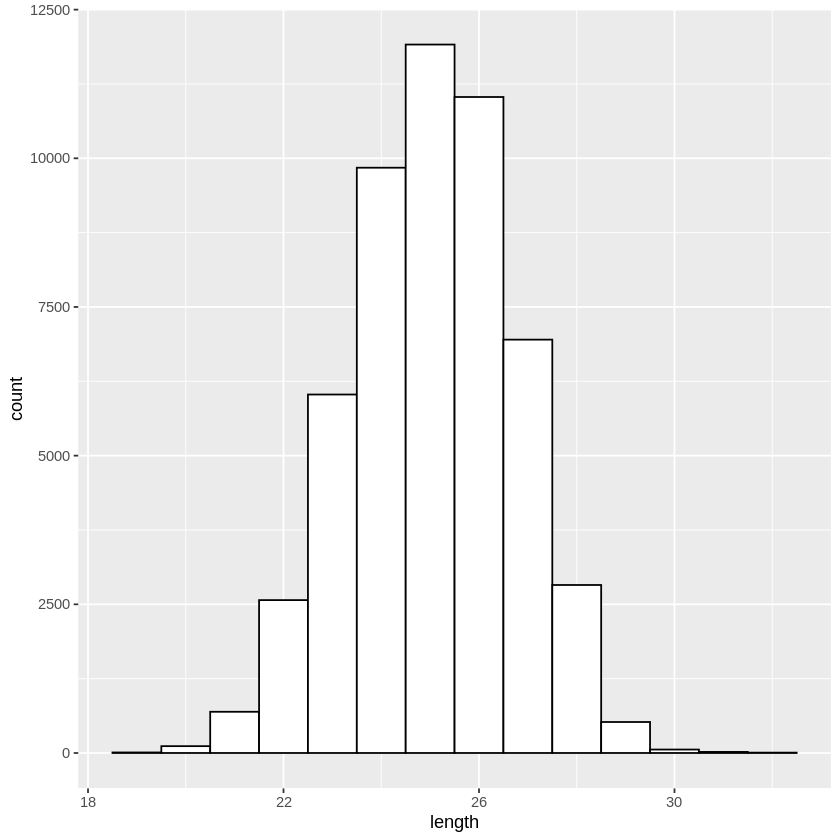

In [29]:
ggplot(herrings, aes(x=length)) + geom_histogram(binwidth=1, colour="black", fill="white")

In [30]:
herrings_sst <- herrings %>%
  group_by(sst) %>%
  summarise_all(list(mean))
head(herrings_sst)

sst,length,cfin1,cfin2,chel1,chel2,lcop1,lcop2,fbar,recr,cumf,totaln,sal,xmonth,nao
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12.76907,25.07811,0.3242667731,2.51943856,6.9547433,25.26477,9.0626935,28.74649,0.2918358,1191163.9,0.20661105,589596.2,35.52637,7.889396,0.4959977
13.06453,26.13200,0.1743959240,0.56235277,5.8221577,36.51811,6.0298344,45.31168,0.2000612,1376987.5,0.10717570,774155.0,35.51170,7.064414,-3.5900528
13.06587,27.63106,0.0298063485,0.25299344,8.6583195,27.18707,9.0113493,29.62067,0.5208015,326817.4,0.27670903,194248.9,35.49927,8.293939,0.3433030
13.19707,26.31643,0.2054674221,19.32158559,11.2327477,32.58732,11.7843294,65.38431,0.4668628,168774.1,0.38525971,202274.2,35.47848,7.529490,-2.2495494
13.28067,25.54318,0.0001098682,0.18790945,0.0000000,11.13299,1.7640079,20.96533,0.1410000,405494.0,0.07553247,1015594.9,35.51322,7.639420,-2.3800000
13.37547,26.64576,0.0373966102,0.04411924,0.2809301,15.89253,0.3626219,16.28908,0.8475508,281627.2,0.36293531,144334.8,35.50892,5.845339,0.1599788


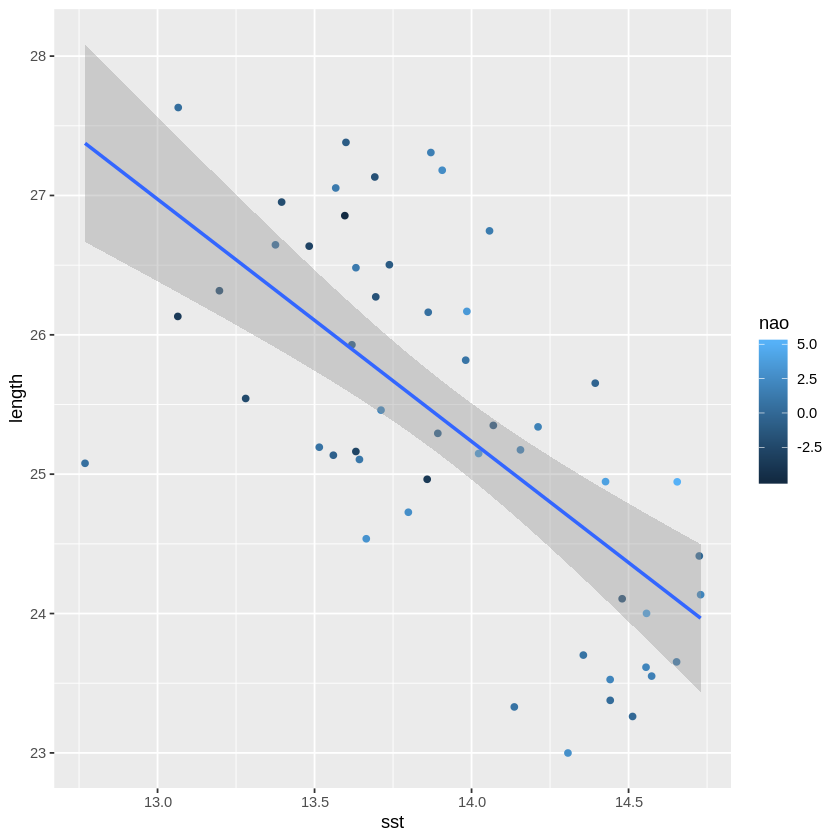

In [31]:
ggplot(
  herrings_sst,
  aes(x=sst,
      y=length,
      color=nao
  )
) +
geom_point() + geom_smooth(method='lm')

In [42]:
herrings_nao <- herrings %>%
  group_by(nao) %>%
  summarise_all(list(mean))
head(herrings_nao)

nao,length,cfin1,cfin2,chel1,chel2,lcop1,lcop2,fbar,recr,cumf,totaln,sst,sal,xmonth
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-4.89,26.85497,0.000000e+00,0.9213022,74.959785,30.39789,74.876410,38.220573,0.5670000,254830.0,0.29803276,568477.6,13.59657,35.46781,7.712476
-3.78,24.94089,1.812397e-02,0.3237444,6.285385,36.78675,6.729149,39.385866,0.6238300,370739.5,0.33379591,286859.9,13.91149,35.54028,7.226601
-3.60,26.13372,1.697060e-01,0.5574740,5.756078,36.56152,5.945652,45.358867,0.1998266,1380210.0,0.10692258,774752.5,13.06685,35.51174,7.054968
-2.88,26.63618,1.110364e-01,1.5665203,31.984276,26.31947,33.324776,36.193003,0.2440000,741245.0,0.16403872,763082.9,13.48331,35.52719,8.127483
-2.86,25.16366,8.232941e-06,0.7093484,11.497964,5.69498,22.982830,9.191195,0.2263123,421405.3,0.14780203,731664.0,13.63144,35.50835,6.196044
-2.38,25.54318,1.098682e-04,0.1879095,0.000000,11.13299,1.764008,20.965330,0.1410000,405494.0,0.07553247,1015594.9,13.28067,35.51322,7.639420


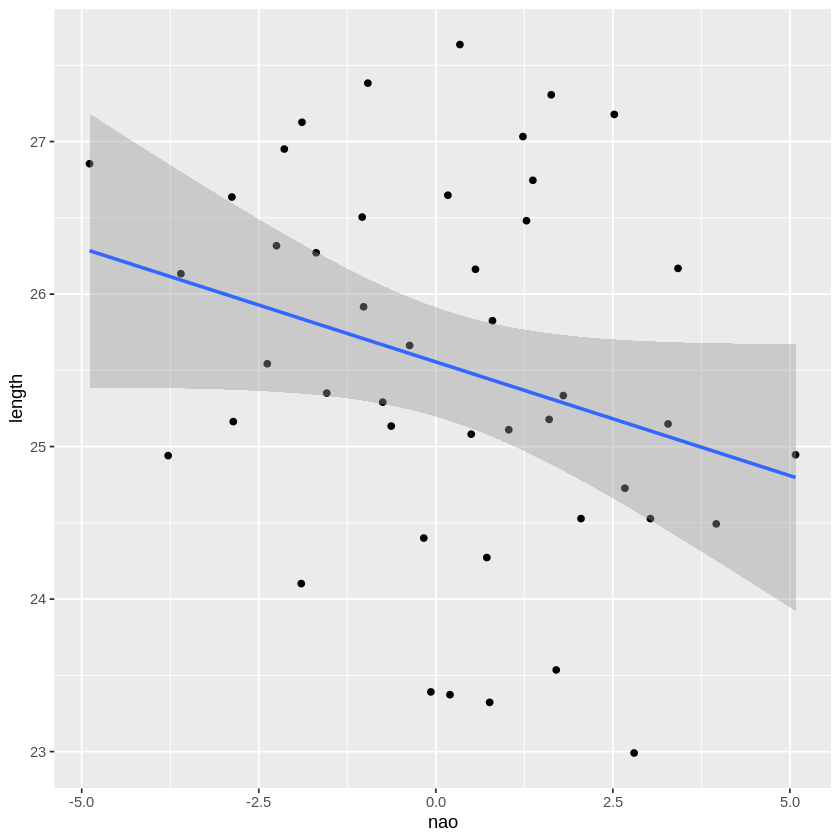

In [43]:
ggplot(
  herrings_nao,
  aes(x=nao,
      y=length
  )
) +
geom_point() + geom_smooth(method='lm')

In [32]:
herrings_fbar <- herrings %>%
  group_by(fbar) %>%
  summarise_all(list(mean))
head(herrings_fbar)

fbar,length,cfin1,cfin2,chel1,chel2,lcop1,lcop2,recr,cumf,totaln,sst,sal,xmonth,nao
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.068,24.13565,0.1996845,0.0131200,2.418780,17.20894,2.810200,22.68479,833003,0.06832592,363016.8,14.72947,35.58002,7.406940,2.050000
0.074,23.65394,0.1000000,1.0912700,2.273495,24.83765,2.505766,31.02795,373947,0.10337221,396283.7,14.65276,35.55342,6.646061,1.091879
0.083,23.52692,0.0000000,0.0000000,4.811380,12.72835,5.165740,15.89364,355107,0.07361507,595514.4,14.44172,35.45592,7.157470,2.050000
0.098,25.33458,0.8161931,0.3641833,6.052866,15.56066,9.683288,22.82752,837339,0.07791807,631877.9,14.21069,35.51007,7.758105,1.800000
0.100,23.61442,0.0000000,0.0100000,1.021430,26.00617,1.064290,34.14560,1322000,0.09222023,648314.9,14.55523,35.53620,6.954233,2.050000
0.125,25.91667,37.6666700,10.1696200,64.750000,43.64470,115.583330,59.08524,1565890,0.09586014,727441.4,13.61893,35.53495,9.000000,-1.020000


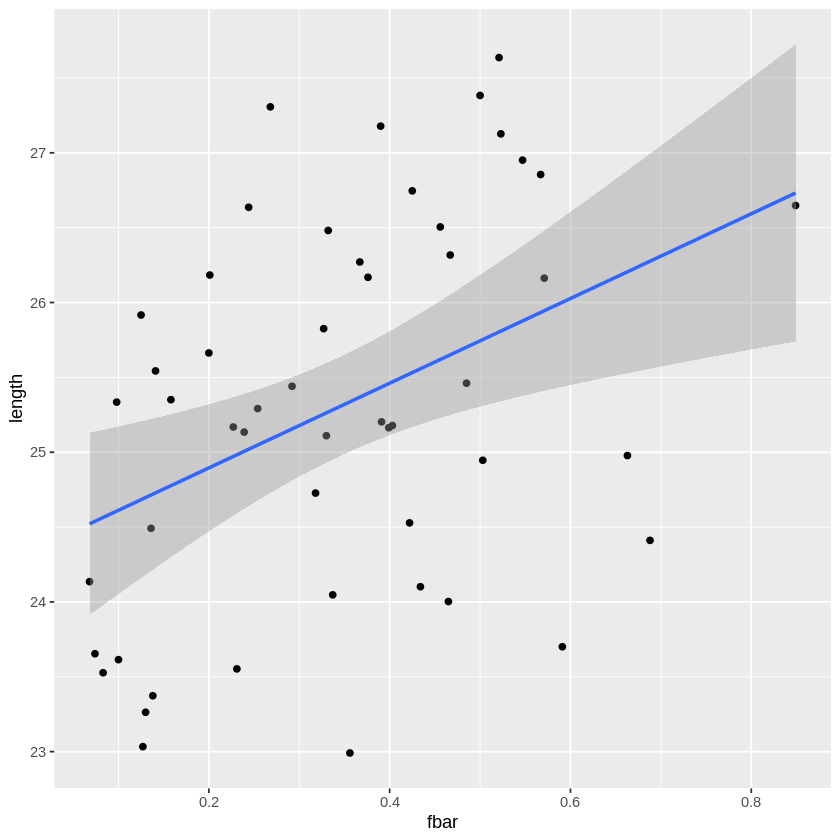

In [33]:
ggplot(
  herrings_fbar,
  aes(x=fbar,
      y=length
  )
) +
geom_point() + geom_smooth(method='lm')

In [35]:
herrings_chel1 <- herrings %>%
  group_by(chel1) %>%
  summarise_all(list(mean))
head(herrings_chel1)

chel1,length,cfin1,cfin2,chel2,lcop1,lcop2,fbar,recr,cumf,totaln,sst,sal,xmonth,nao
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00000,25.53261,0.0006168478,0.20997845,12.754725,1.7657498,21.448672,0.1470259,446480.9,0.08369962,954127.6,13.44843,35.51423,7.610766,-1.9637940
0.22870,26.62199,0.0373892116,0.04024031,15.837102,0.3510128,16.277370,0.8372075,293163.7,0.35948728,159828.2,13.38341,35.50978,5.865145,0.1225311
0.60308,26.15993,0.1894000000,0.85446699,9.480086,0.8356992,10.801611,0.5698222,467424.1,0.34916243,386468.7,13.86140,35.51795,7.012702,0.5470092
0.76642,24.72698,0.0357522086,1.07997180,10.132066,1.3574756,14.554720,0.3180000,766083.0,0.23240831,559434.9,13.79937,35.51146,6.795436,2.6700000
1.02143,23.61416,0.0023403653,0.01834062,26.005056,1.0868112,34.153012,0.1008790,1320635.0,0.09288598,647878.4,14.55330,35.53615,6.961187,2.0500000
1.36660,24.94635,0.0907858904,0.57932904,5.333199,1.5547170,8.036328,0.5029589,503768.3,0.30716814,329451.6,14.65018,35.52545,7.349315,5.0730822


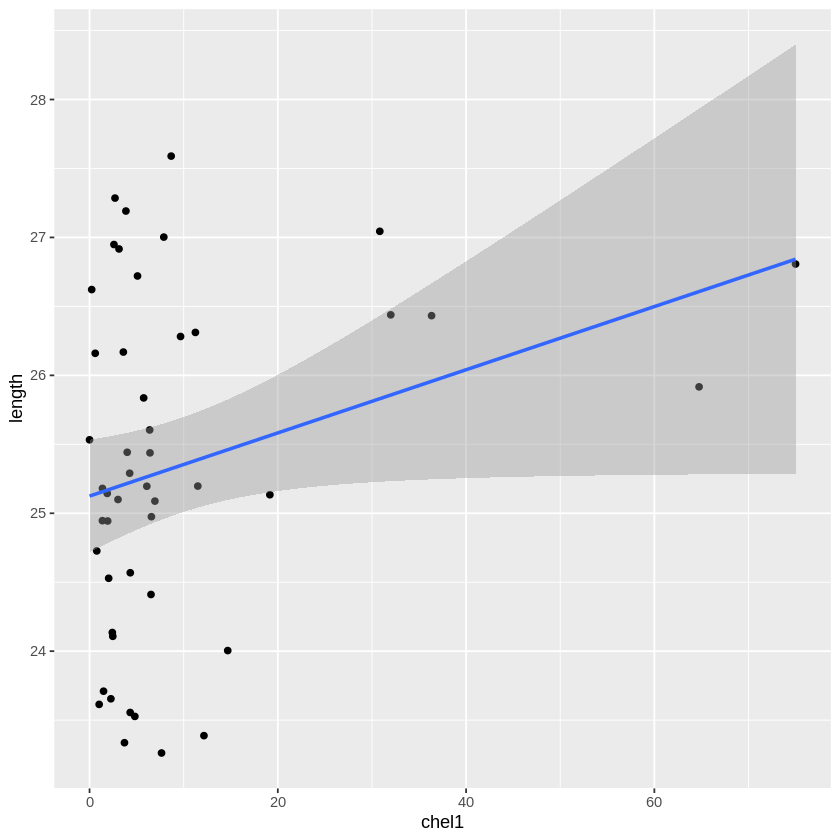

In [36]:
ggplot(
  herrings_chel1,
  aes(x=chel1,
      y=length
  )
) +
geom_point() + geom_smooth(method='lm')

In [0]:
herrings_sal <- herrings %>%
  group_by(sal) %>%
  summarise_all(list(min))

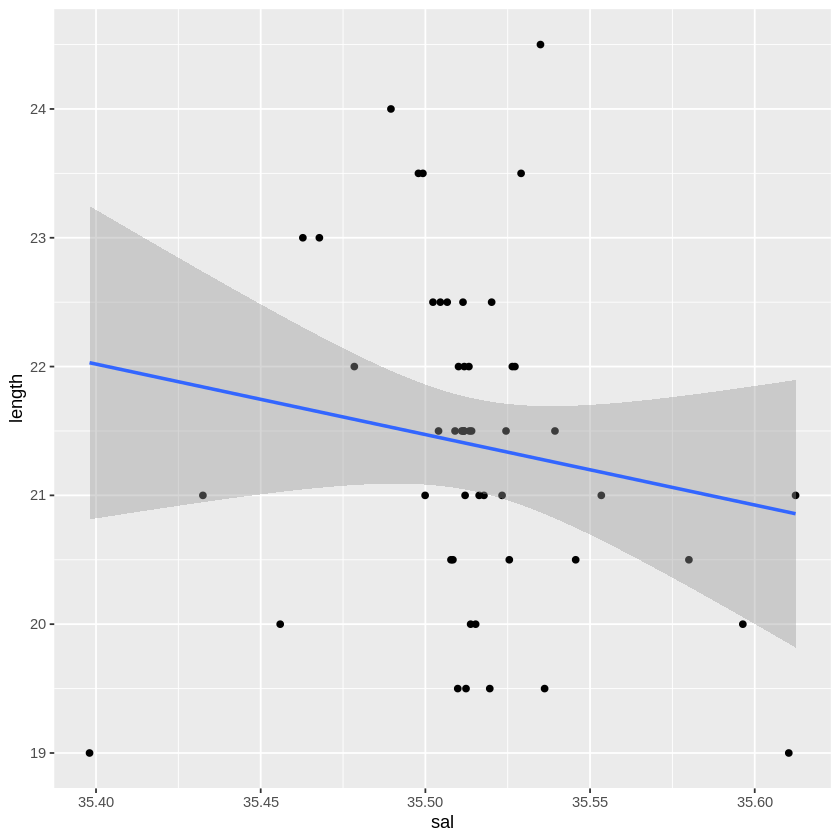

In [41]:
ggplot(
  herrings_sal,
  aes(x=sal,
      y=length
  )
) +
geom_point() + geom_smooth(method='lm')

# Correlations

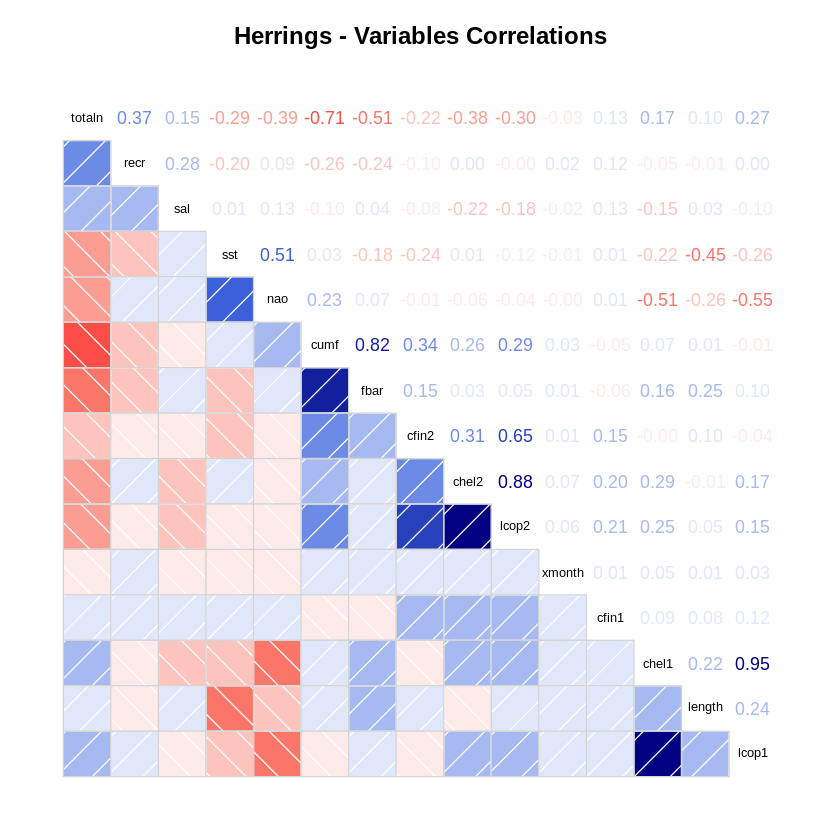

In [34]:
# red - reverse correation

corrgram(herrings, order=TRUE, lower.panel=panel.shade,
  upper.panel=panel.cor, text.panel=panel.txt,
  main="Herrings - Variables Correlations")

# Interactive graph